<a href="https://colab.research.google.com/github/PDeySarkar103/Dissertation_103/blob/main/103_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
import time #For getting time elapsed for each algorithm

# Loading Datasets

In [4]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 24.8 MB/s eta 0:00:00


In [5]:
from astroquery.sdss import SDSS

query = """SELECT TOP 500000
p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
 p.run, p.rerun, p.camcol, p.field,
s.specobjid, s.class, s.z as redshift,
s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
JOIN SpecObj AS s ON s.bestobjid = p.objid
"""
res = SDSS.query_sql(query, data_release=18)
df = res.to_pandas()
df.to_csv('SDSS18.csv')

In [6]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237660961327743273,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6543777369295181824,GALAXY,0.634794,5812,56354,171
1,1237664879951151463,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,11760142036707334144,GALAXY,0.779136,10445,58158,427
2,1237660961330430096,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5152200256025548800,GALAXY,0.644195,4576,55592,299
3,1237663478724298013,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,10301071412954421248,GALAXY,0.932346,9149,58039,775
4,1237680272041377978,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6891864880783316992,GALAXY,0.116123,6121,56187,842


In [7]:
df.shape

(500000, 18)

# EDA(Exploratory Data Analysis)

In [8]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  uint64 
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  uint64 
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(8), int64(7), object(1), uint64(2)
memory usage: 68.7

In [10]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.00000,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000
mean,1.237665e+18,173.648605,24.443893,21.483189,20.033707,19.207208,18.577246,18.195551,4496.219330,301.0,3.226010,183.96909,5.740771e+18,0.573686,5098.721204,55574.348786,440.005304
std,8.547381e+12,95.807828,19.762514,77.653860,76.332501,63.389212,67.966746,72.258320,1990.093809,0.0,1.616281,140.08194,3.286655e+18,0.725617,2919.118668,1799.914533,273.469518
min,1.237646e+18,0.000095,-18.865961,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,109.000000,301.0,1.000000,11.00000,2.994897e+17,-0.010932,266.000000,51608.000000,1.000000
25%,1.237658e+18,126.774704,6.474018,20.321310,18.902997,18.046343,17.642142,17.379135,2986.000000,301.0,2.000000,83.00000,2.859917e+18,0.066367,2540.000000,54252.000000,209.000000
50%,1.237664e+18,173.349946,23.298187,22.183645,21.090010,20.102030,19.378440,18.974905,4263.000000,301.0,3.000000,148.00000,5.617172e+18,0.425140,4989.000000,55882.000000,417.000000
75%,1.237670e+18,229.706037,40.006841,23.709263,22.123803,21.007830,20.330680,19.869330,5598.000000,301.0,5.000000,246.00000,8.190972e+18,0.688099,7275.000000,56711.000000,638.000000
max,1.237681e+18,359.999810,84.490494,32.781390,31.602240,31.990100,32.141470,29.514250,8162.000000,301.0,6.000000,1000.00000,1.412694e+19,7.051930,12547.000000,58932.000000,1000.000000


In [11]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [12]:
df['class'].unique() # The unique elements in class column

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [13]:
df['class'].value_counts()

GALAXY    305795
STAR      101432
QSO        92773
Name: class, dtype: int64

# Visualization of Data

## Histogram plot

In [14]:
sns.set(style='darkgrid',palette='dark')

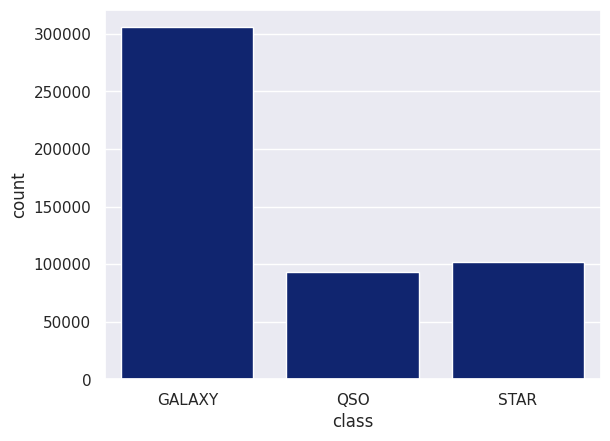

In [15]:
sns.countplot(x=df['class'])
plt.show()

## Correlation Matrix

<Axes: >

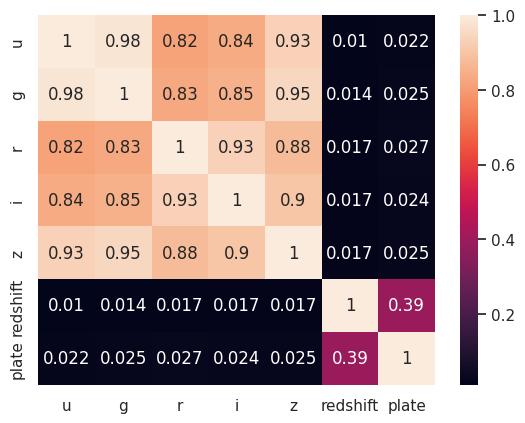

In [16]:
# Heatmap for expressing correlation

#plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['objid','ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis = 1).corr(),annot = True)

## Pairplot

In [17]:
data_pp=df.drop(['objid','ra','dec','run','rerun','camcol','field','specobjid','mjd','fiberid'],axis=1)
#hue_pp=df['class']

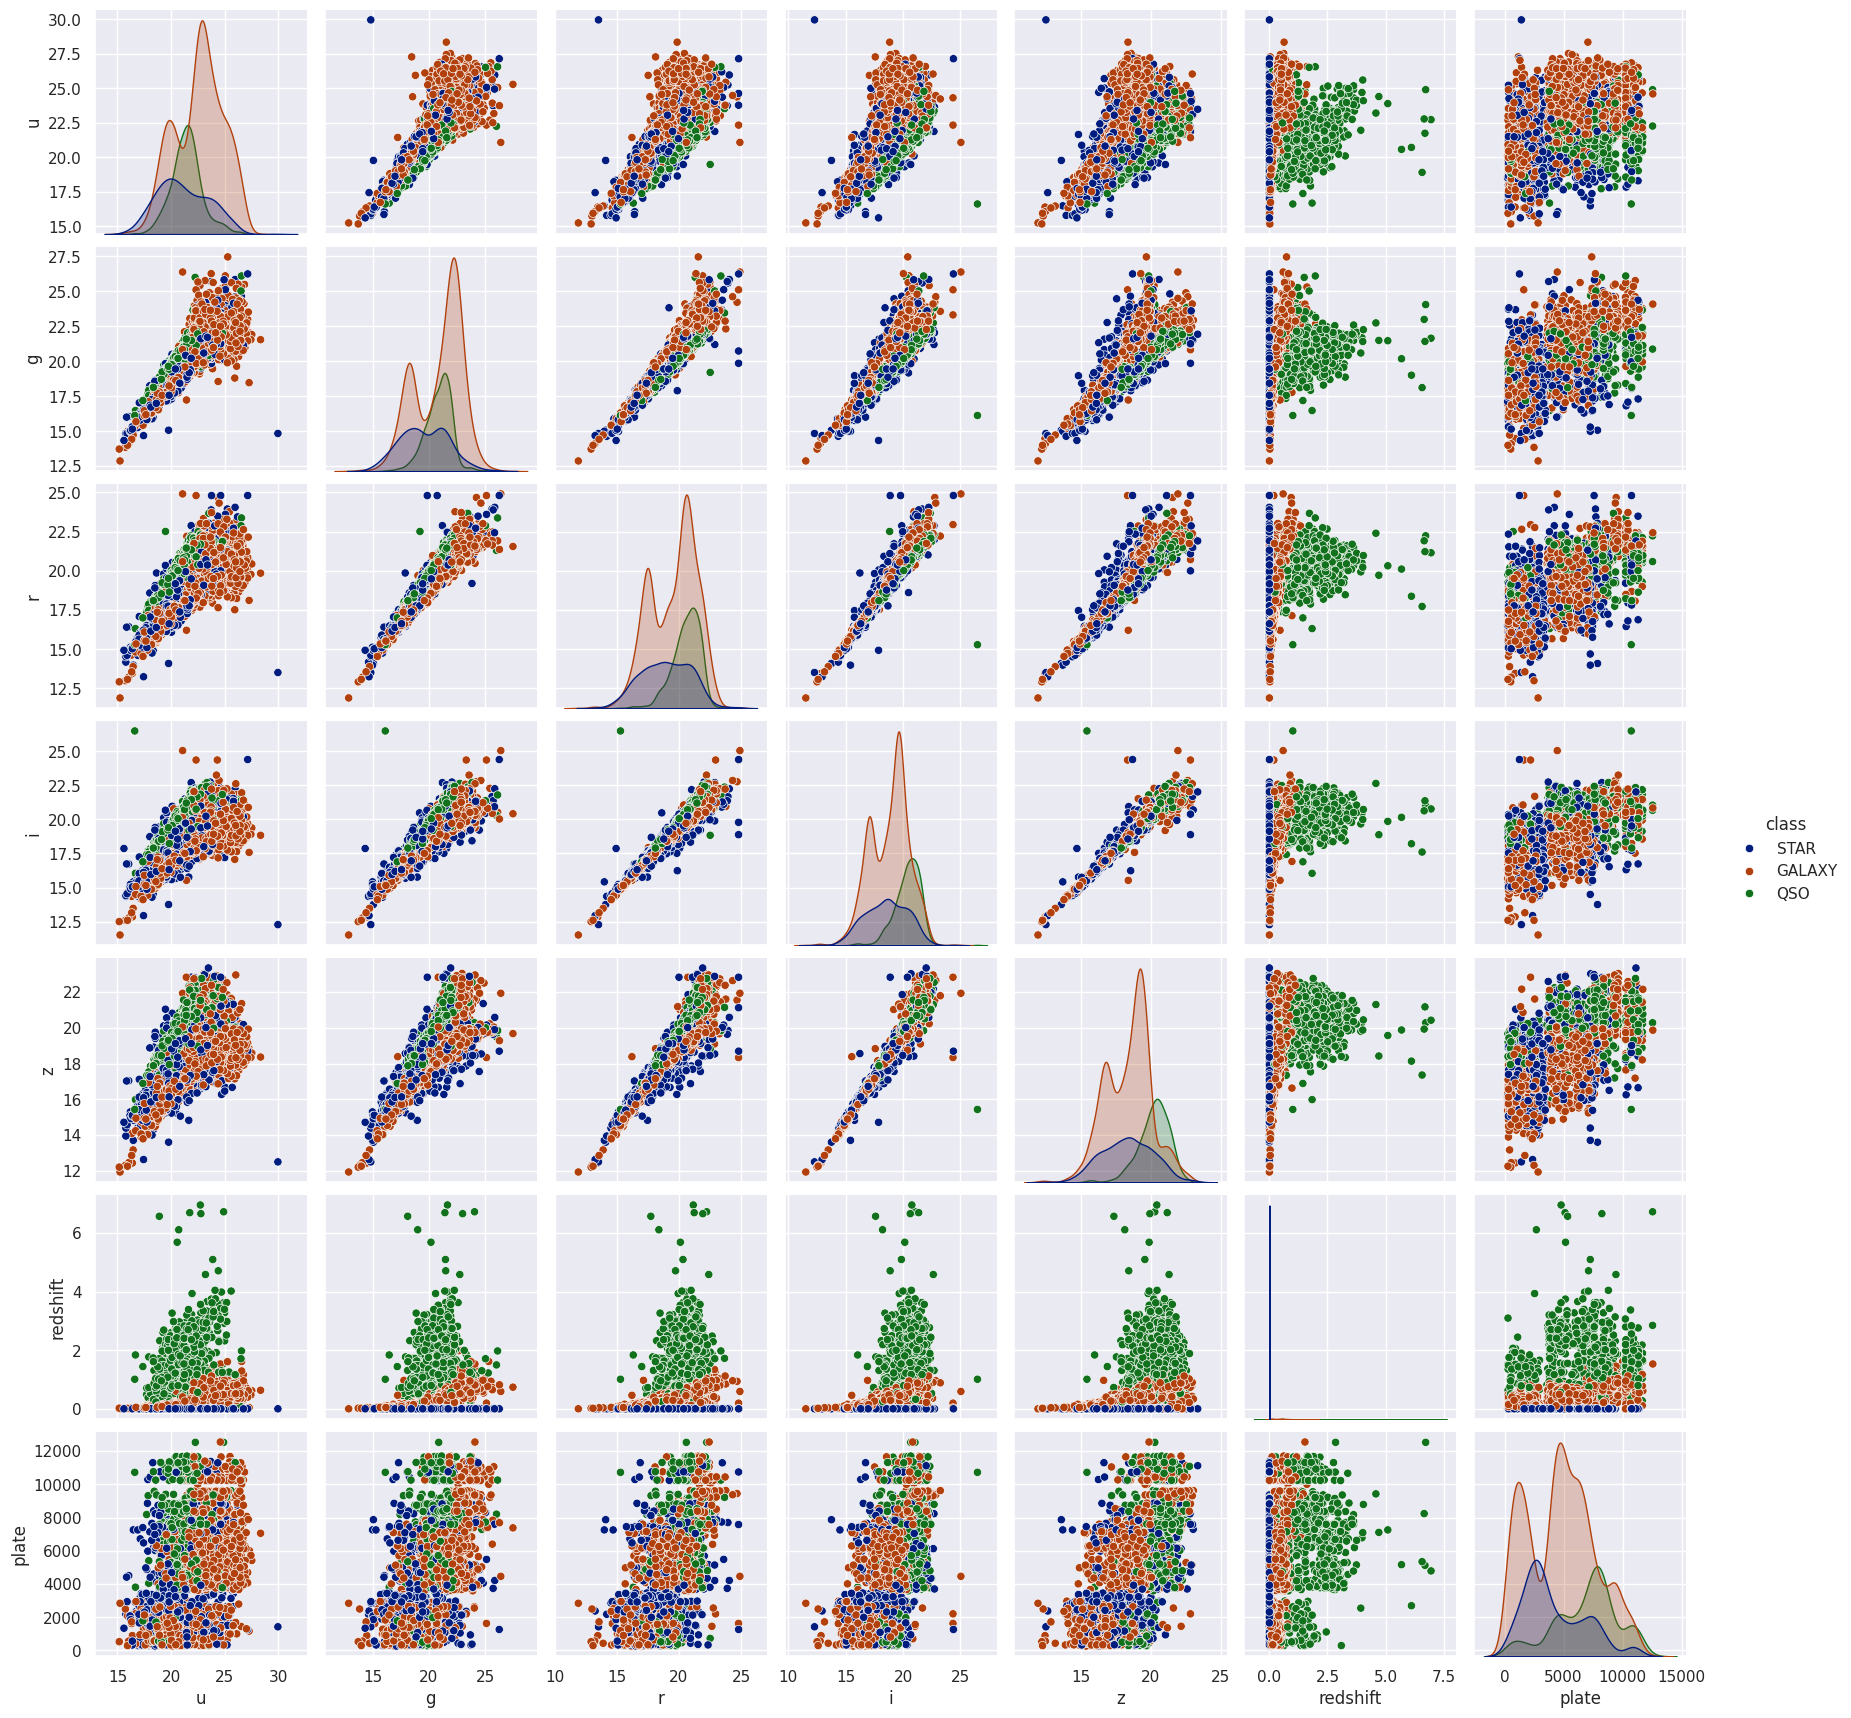

In [18]:
sns.pairplot(data_pp.sample(5000),hue='class')

## Bin plot

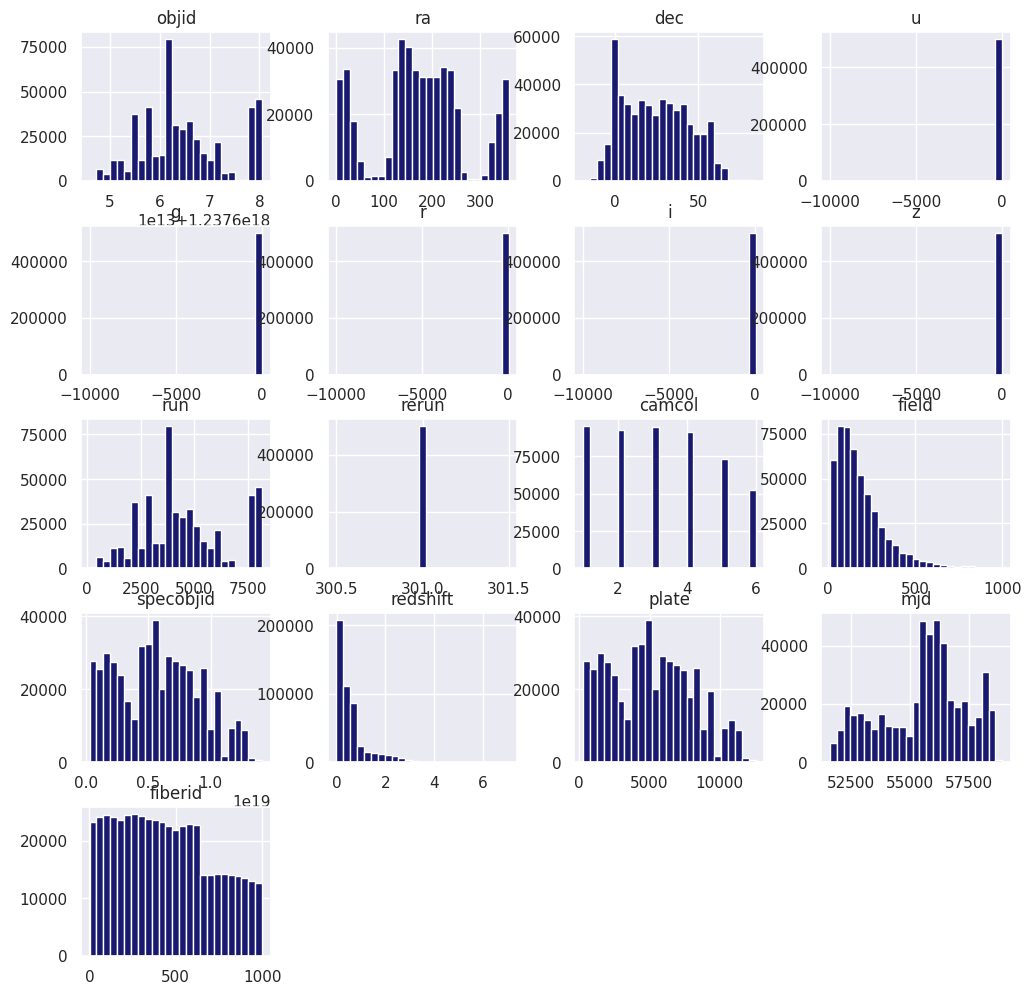

In [19]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Data Preprocessing

## Feature Selection

In [20]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
499995,21.52398,20.65560,19.79746,19.54312,19.24718,2.435549,7339
499996,21.03967,20.43661,20.08944,20.08518,19.73713,0.924882,6725
499997,20.65908,20.96340,20.59787,20.36786,20.55444,1.315184,8401
499998,25.28938,21.25637,19.49524,18.78515,18.36761,0.398087,5493


In [21]:
Y=df['class']
Y

0         GALAXY
1         GALAXY
2         GALAXY
3         GALAXY
4         GALAXY
           ...  
499995       QSO
499996       QSO
499997       QSO
499998    GALAXY
499999    GALAXY
Name: class, Length: 500000, dtype: object

## Resampling

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, Y_res = sm.fit_resample(X, Y)

In [23]:
X_res

,u,g,r,i,z,redshift,plate
0,23.878820,22.275300,20.395010,19.165730,18.793710,0.634794,5812
1,24.777590,22.831880,22.584440,21.168120,21.614270,0.779136,10445
2,25.263070,22.663890,20.609760,19.348570,18.948270,0.644195,4576
3,22.136820,23.776560,21.611620,20.504540,19.250100,0.932346,9149
4,19.437180,17.580280,16.497470,15.977110,15.544610,0.116123,6121
...,...,...,...,...,...,...,...
917380,23.892620,21.272912,20.640159,20.364113,20.374368,-0.000330,3944
917381,22.886978,21.646579,21.587911,21.600076,21.405119,-0.000564,5456
917382,22.480481,21.684949,21.253837,21.138274,21.130285,-0.000438,11653
917383,17.878736,16.130481,15.472577,15.248089,15.137356,-0.000048,1096


In [24]:
Y_res

0         GALAXY
1         GALAXY
2         GALAXY
3         GALAXY
4         GALAXY
           ...  
917380      STAR
917381      STAR
917382      STAR
917383      STAR
917384      STAR
Name: class, Length: 917385, dtype: object

In [25]:
# Generating the resampled dataset
df1=X_res
Y_res1=Y_res
Y_res1=Y_res1.tolist()
df1.loc[:,'class']=Y_res1
df1

,u,g,r,i,z,redshift,plate,class
0,23.878820,22.275300,20.395010,19.165730,18.793710,0.634794,5812,GALAXY
1,24.777590,22.831880,22.584440,21.168120,21.614270,0.779136,10445,GALAXY
2,25.263070,22.663890,20.609760,19.348570,18.948270,0.644195,4576,GALAXY
3,22.136820,23.776560,21.611620,20.504540,19.250100,0.932346,9149,GALAXY
4,19.437180,17.580280,16.497470,15.977110,15.544610,0.116123,6121,GALAXY
...,...,...,...,...,...,...,...,...
917380,23.892620,21.272912,20.640159,20.364113,20.374368,-0.000330,3944,STAR
917381,22.886978,21.646579,21.587911,21.600076,21.405119,-0.000564,5456,STAR
917382,22.480481,21.684949,21.253837,21.138274,21.130285,-0.000438,11653,STAR
917383,17.878736,16.130481,15.472577,15.248089,15.137356,-0.000048,1096,STAR


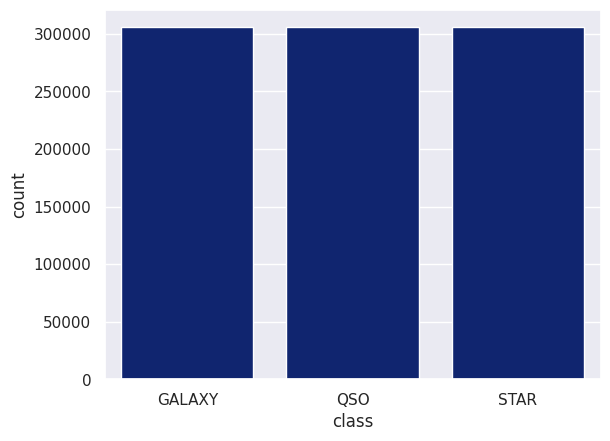

In [26]:
sns.countplot(x=df1['class'])
plt.show()

# ML Methods

## Encoding

In [27]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [28]:
#df['class'].value_counts()

In [29]:
Y=df1['class']

In [30]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y_resML=LE.fit_transform(Y)

In [31]:
Y_resML

array([0, 0, 0, ..., 2, 2, 2])

In [32]:
X_res=df1[['u','g','r','i','z','redshift','plate']]
X_res

,u,g,r,i,z,redshift,plate
0,23.878820,22.275300,20.395010,19.165730,18.793710,0.634794,5812
1,24.777590,22.831880,22.584440,21.168120,21.614270,0.779136,10445
2,25.263070,22.663890,20.609760,19.348570,18.948270,0.644195,4576
3,22.136820,23.776560,21.611620,20.504540,19.250100,0.932346,9149
4,19.437180,17.580280,16.497470,15.977110,15.544610,0.116123,6121
...,...,...,...,...,...,...,...
917380,23.892620,21.272912,20.640159,20.364113,20.374368,-0.000330,3944
917381,22.886978,21.646579,21.587911,21.600076,21.405119,-0.000564,5456
917382,22.480481,21.684949,21.253837,21.138274,21.130285,-0.000438,11653
917383,17.878736,16.130481,15.472577,15.248089,15.137356,-0.000048,1096


In [33]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

In [34]:
X_res.size

6421695

## Splitting Datasets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res,Y_resML,test_size=0.25,random_state=30)

In [36]:
X_train

,u,g,r,i,z,redshift,plate
270936,24.918170,23.400640,22.108270,20.725270,19.977160,-0.000365,7665
222219,24.091130,22.445560,20.592610,19.721790,19.428210,0.560344,6664
735340,22.791349,20.861371,19.512756,18.408974,17.975052,-0.000076,3367
150123,24.600430,21.924510,20.885190,19.887440,19.333010,0.516280,7101
552895,19.628045,19.556692,19.211578,19.251106,19.239479,1.142230,2746
...,...,...,...,...,...,...,...
328599,24.019250,21.208070,21.024070,20.902960,21.282560,3.025173,7686
570508,21.410294,21.406571,20.905566,20.731906,20.819492,1.160087,7664
885236,23.960712,23.837098,21.955965,20.288148,19.350095,-0.000089,9367
572333,21.094880,21.166286,20.839058,20.828104,20.818165,1.392117,7602


In [37]:
y_train

array([2, 0, 2, ..., 2, 1, 0])

## Classification Algorithms

In [55]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score','Time'])

In [56]:
score_df

,Algorithm,Recall_Score,Time


### Logistic Regression

In [57]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

start_time=time.time()
model.fit(X_train,y_train)
end_time=time.time()

y_pred1=model.predict(X_test)

LR_time=end_time-start_time

Text(46.25, 0.5, 'Prediction')

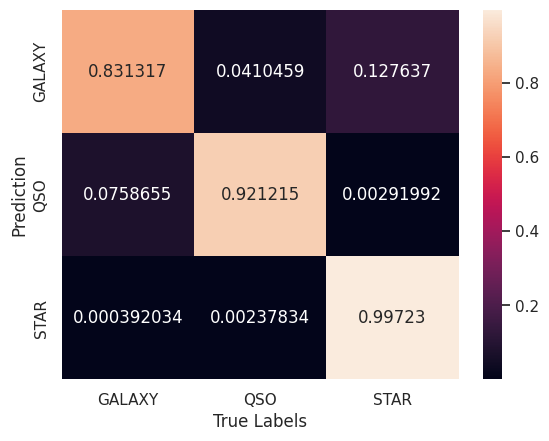

In [58]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1,normalize='true')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [59]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score,'Time':LR_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223


### Decision Tree

In [60]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion='entropy',random_state=30)

start_time=time.time()
model.fit(X_train,y_train)
end_time=time.time()

y_pred2=model.predict(X_test)
DT_time=end_time-start_time

Text(46.25, 0.5, 'Prediction')

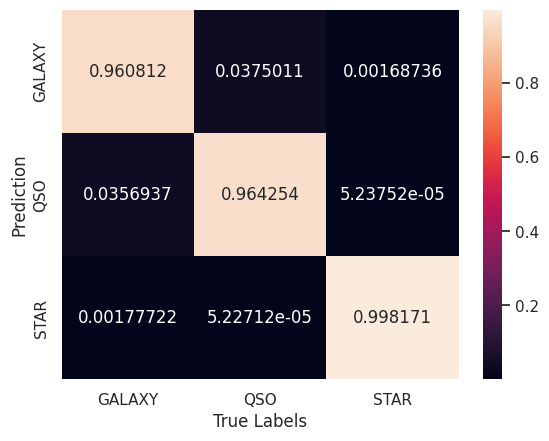

In [61]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2,normalize='true')

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [62]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score,'Time':DT_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223
1,Decision Tree,0.974423,0.283632


### Random Forest

In [63]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

start_time=time.time()
for i in range(1,31):
  model=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [65]:
rf_df

,Estimators,Recall score
0,1.0,0.968005
1,2.0,0.971441
2,3.0,0.978208
3,4.0,0.979211
4,5.0,0.980501
5,6.0,0.980702
6,7.0,0.981286
7,8.0,0.981321
8,9.0,0.981657
9,10.0,0.981657


In [66]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
29,30.0,0.982725
28,29.0,0.982677
24,25.0,0.982642
22,23.0,0.982629
27,28.0,0.982607


:The above table shows that the recall score is highest for n=30.0. So we'll keep n_estimators=30.0

In [67]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=30,random_state=30)
model.fit(X_train,y_train)
end_time=time.time()
y_pred3=model.predict(X_test)

RF_time=end_time-start_time

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.9827248666867237

In [68]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score,'Time':RF_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223
1,Decision Tree,0.974423,0.283632
2,Random Forest,0.982725,32.667880


Text(46.25, 0.5, 'Prediction')

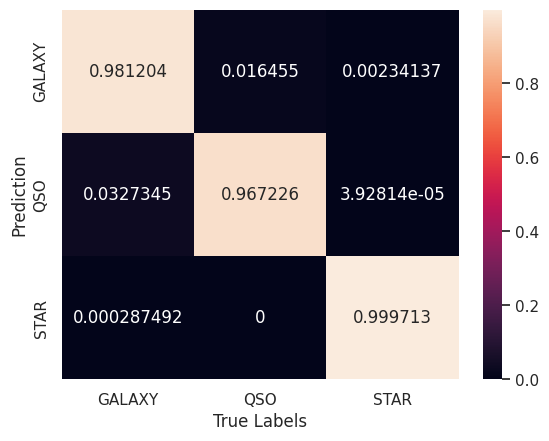

In [69]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3,normalize='true')

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

### KNN

In [70]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [71]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

start_time=time.time()
for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.948846
1,2.0,0.935992
2,3.0,0.937549
3,4.0,0.930668
4,5.0,0.929814
5,6.0,0.924651
6,7.0,0.923614
7,8.0,0.918987
8,9.0,0.918019
9,10.0,0.914287


In [72]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
0,1.0,0.948846
2,3.0,0.937549
1,2.0,0.935992
3,4.0,0.930668
4,5.0,0.929814


Here, we see the recall score is maximum for n=1.0 Hence, we will choose n=1.0

In [73]:
# KNN algo for n_neighbors=1.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

end_time=time.time()
y_pred4=model.predict(X_test)

KNN_time=end_time-start_time
from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.9488460716730543


In [74]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score,'Time':KNN_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223
1,Decision Tree,0.974423,0.283632
2,Random Forest,0.982725,32.667880
3,KNN,0.948846,13.689416


Text(46.25, 0.5, 'Prediction')

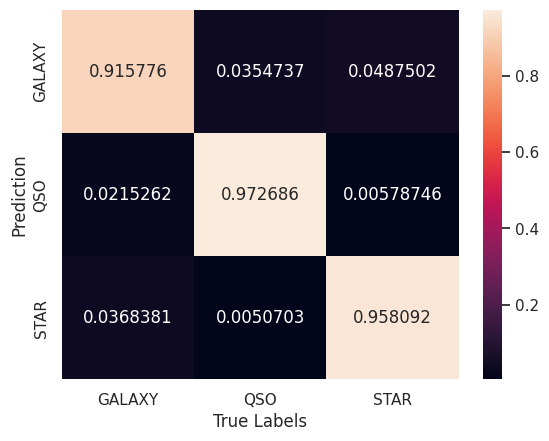

In [75]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4,normalize='true')

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

### SVM

# Neural Networks

### Re-encode

In [76]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
l_encode=LabelEncoder()
l_encode.fit(Y_res)
Y_resN=l_encode.transform(Y_res)
Y_resN=to_categorical(Y_resN)

Resampling the data

### Splitting to training and testing data set

In [77]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(X_res,Y_resN,test_size=0.25,random_state=210)

In [78]:
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((688038, 7), (229347, 7), (688038, 3), (229347, 3))

Now, we shall make the model. For that we have to import th following

## ANN

### Making the model

In [79]:
import tensorflow as tf
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [80]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(48,activation='relu'),
    #tf.keras.layers.Dense(32,activation='relu'),
    #tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 48)                6192      
                                                                 
 dense_2 (Dense)             (None, 3)                 147       
                                                                 
Total params: 7363 (28.76 KB)
Trainable params: 7363 (28.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compiling the model

In [82]:
start_time=time.time()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

end_time=time.time()

ANN_time=end_time-start_time

<Axes: >

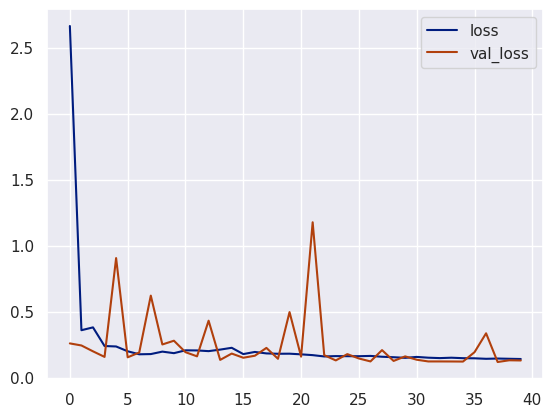

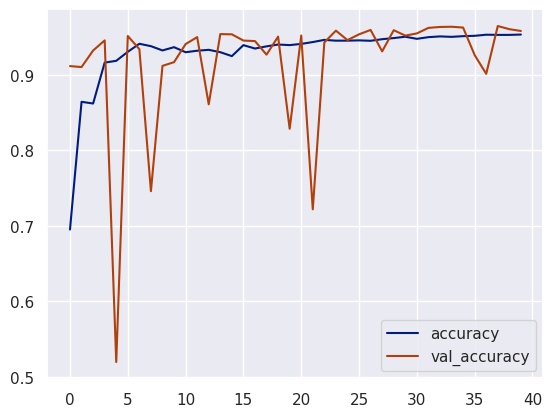

In [83]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

### Evaluating the model's accuracy

In [84]:
y_pred6=np.round(model.predict(Xr_test))

7168/7168 [==============================] - 12s 2ms/step


In [85]:
y_pred6

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [86]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

0.9582030722006392

In [87]:
score_df=score_df.append({'Algorithm':'ANN','Recall_Score':ann_score,'Time':ANN_time/60},ignore_index=True)
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223
1,Decision Tree,0.974423,0.283632
2,Random Forest,0.982725,32.667880
3,KNN,0.948846,13.689416
4,ANN,0.958203,30.900539


In [88]:
score_df.sort_values(by='Recall_Score')
score_df.head()

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223
1,Decision Tree,0.974423,0.283632
2,Random Forest,0.982725,32.667880
3,KNN,0.948846,13.689416
4,ANN,0.958203,30.900539


In [89]:
y_pred6.shape

(229347, 3)

In [90]:
yr_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
#confusion_matrix(preds2.argmax(axis = 1), yr_test.argmax(axis = 1))

#plt.figure(figsize = (6,6))
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_predictions(yr_test.argmax(axis = 1), y_pred6.argmax(axis = 1), display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Text(46.25, 0.5, 'Prediction')

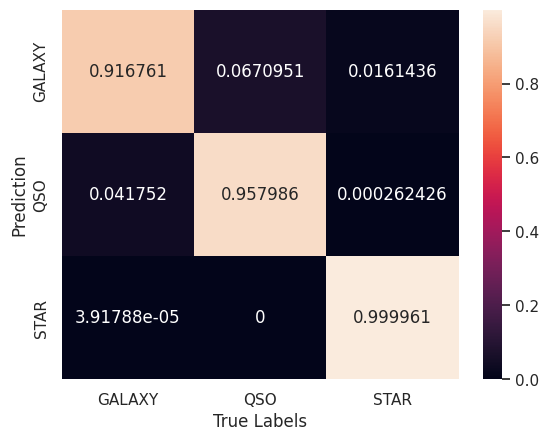

In [91]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_ann=confusion_matrix(yr_test.argmax(axis=1),y_pred6.argmax(axis=1),normalize='true')

sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

# Comparing all the algorithms

## Recall scores

In [92]:
score_df

,Algorithm,Recall_Score,Time
0,Logistic Regression,0.916611,3.011223
1,Decision Tree,0.974423,0.283632
2,Random Forest,0.982725,32.667880
3,KNN,0.948846,13.689416
4,ANN,0.958203,30.900539


## Confusion Matrices

Text(153.75, 0.5, 'Prediction')

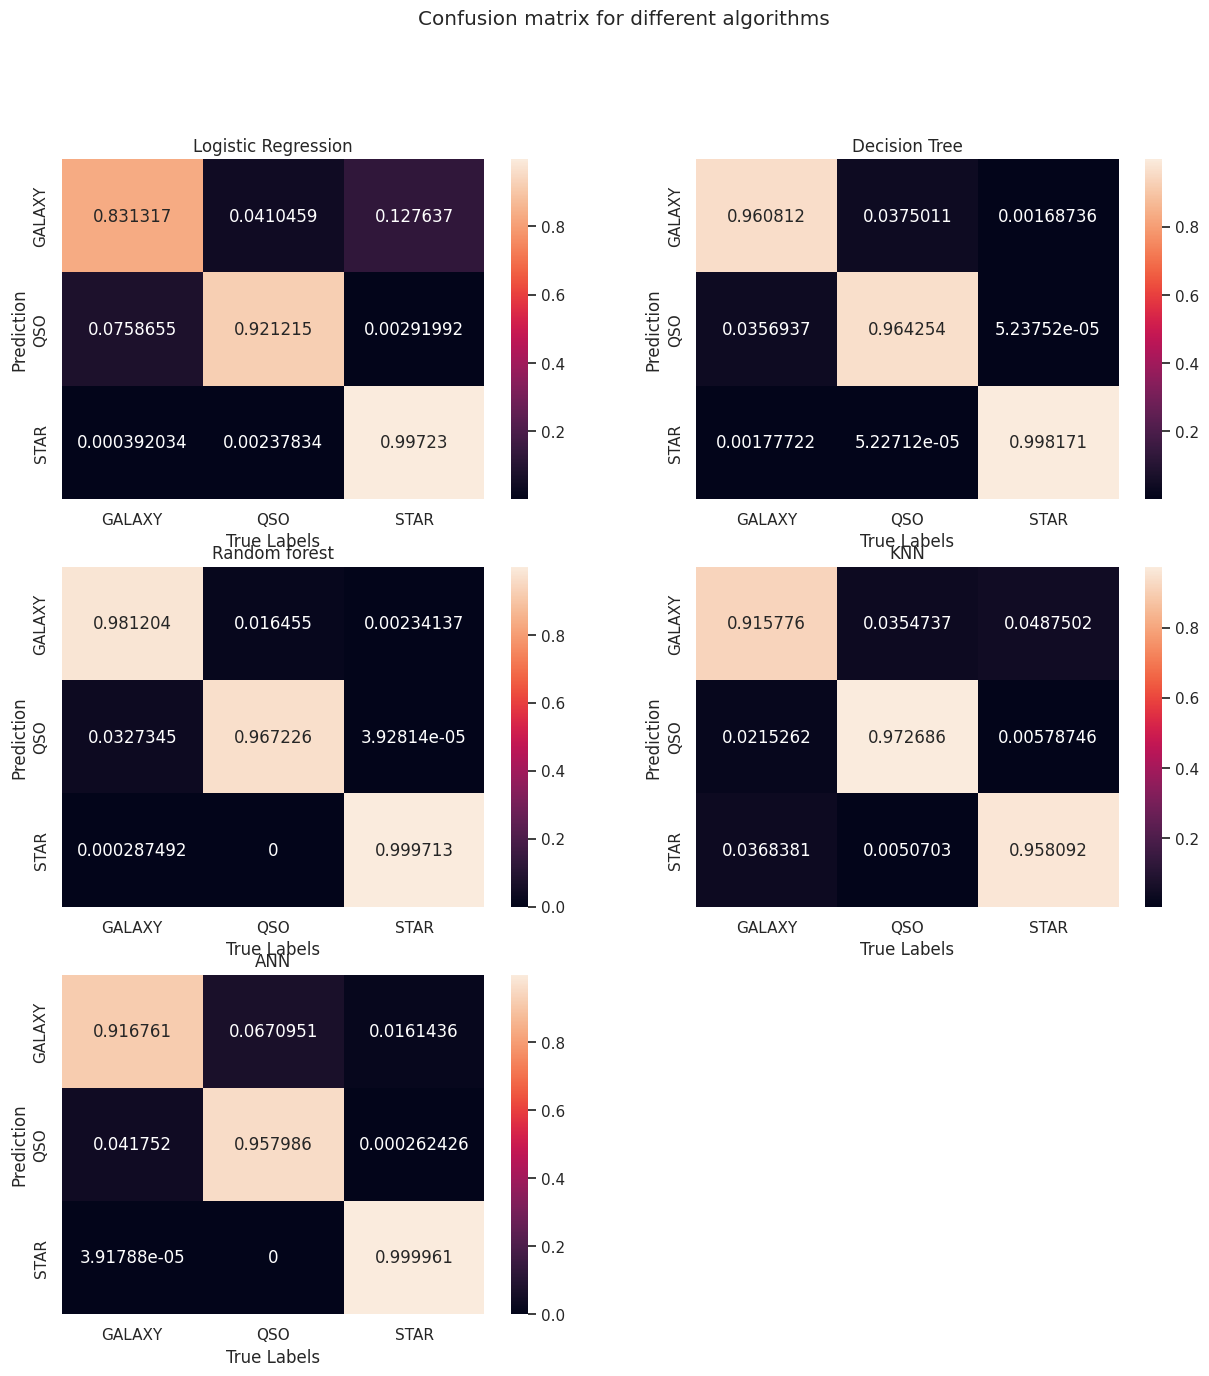

In [93]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(325)
plt.title('ANN')
sns.heatmap(cm_ann,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')
